# PASO 1: Instalar librerías

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## PASO 1.1: Importar herramientas de modelado y evaluación

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

# PASO 2: Cargar dataset  y crear variable objetivo

In [59]:
df = pd.read_csv("ecommerce_roc_moderado.csv")
df['loyalty_program'] = df['loyalty_program'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

* (df["online_purchases"] > df["in_store_purchases"]) : Compara cada fila para ver si el número de compras online es mayor al número de compras en tienda física.

Esto devuelve una serie de valores True o False
* .astype(int)
Convierte los True en 1 y los False en 0, Se convierte el resultado booleano
* df["compra_online"] = Asigna ese resultado a una nueva columna en el DataFrame, llamada compra_online.

# Paso 3: Revisar estructura del dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unit_price        5000 non-null   float64
 1   quantity          5000 non-null   int64  
 2   website_visits    5000 non-null   int64  
 3   membership_years  5000 non-null   int64  
 4   app_usage_score   5000 non-null   int64  
 5   discount_applied  5000 non-null   int64  
 6   age               5000 non-null   int64  
 7   loyalty_program   5000 non-null   int64  
 8   gender            5000 non-null   int64  
 9   ventas            5000 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 390.8 KB


# Paso 4: Descripción estadística general


In [14]:
df.describe(include='all')

,unit_price,quantity,website_visits,membership_years,app_usage_score,discount_applied,age,loyalty_program,gender,ventas
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,50.084029,5.035000,54.086400,4.485800,1.003000,0.402600,40.806200,0.596400,0.503800,0.250000
std,14.947197,2.595057,26.056322,2.878377,0.821904,0.490471,13.558518,0.490668,0.500036,0.433056
min,1.380990,1.000000,10.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,40.131424,3.000000,31.000000,2.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000
50%,50.201984,5.000000,54.000000,5.000000,1.000000,0.000000,41.000000,1.000000,1.000000,0.000000
75%,59.990159,7.000000,76.000000,7.000000,2.000000,1.000000,52.000000,1.000000,1.000000,0.250000
max,108.893566,9.000000,99.000000,9.000000,2.000000,1.000000,64.000000,1.000000,1.000000,1.000000


# Visualización exploratoria

## Gráfico 1: Histograma de distribución de edad

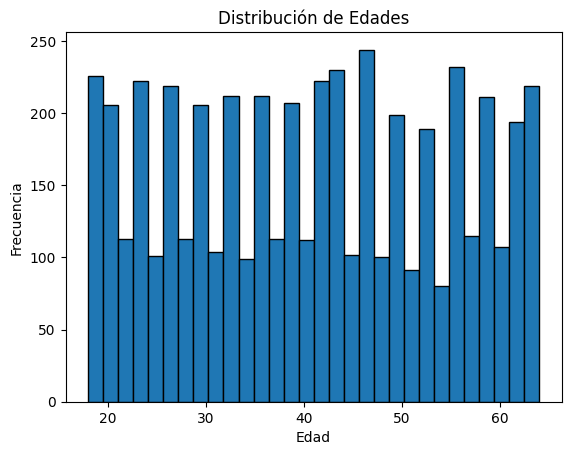

In [15]:

df['age'].dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Gráfico 2: Distribución de Preferencia de Canal de Compra

In [16]:
df['compra_online'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribución de Preferencia de Canal de Compra')
plt.xlabel("Compra Online (1 = Sí, 0 = No)")
plt.xticks([0, 1], ["Tienda Física", "Online"])
plt.ylabel('Cantidad de Clientes')
plt.show()

KeyError: 'compra_online'

 # Paso 5: Evaluación del modelo antes de limpiar los datos

In [60]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Seleccionar variables simples antes de limpieza
df_before = df[[
    "unit_price", "quantity", "website_visits", "app_usage_score", "loyalty_program"
]].dropna()

Xb = df_before.copy()
yb = df.loc[df_before.index, "ventas"]

# División
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

# Modelo base
model_before = LogisticRegression(max_iter=300)
model_before.fit(Xb_train, yb_train)

# Evaluación
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)
print("✅ Exactitud antes de limpieza:", round(acc_before, 4))

✅ Exactitud antes de limpieza: 0.9647


#### Este valor indica que el modelo de regresión logística logró una exactitud del 49.47% al predecir si un cliente prefiere comprar en línea (compra_online = 1) o en tienda física (compra_online = 0), utilizando únicamente las variables Edad (age), Visitas al sitio web (website_visits).

# Paso 6: Preparación del dataset: limpieza, imputación y codificación

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Copia del dataset original
df_clean = df.copy()

# Codificación one-hot si no se hizo antes (aquí ya está en 0/1)
# df_clean = pd.get_dummies(df_clean, columns=['gender'], drop_first=True)

# Imputación específica
df_clean = df_clean.dropna(axis=1, how='all')  # elimina columnas totalmente vacías

num_cols = ['age', 'website_visits', 'membership_years', 'app_usage_score', 
            'discount_applied', 'unit_price', 'quantity']

imputer = SimpleImputer(strategy='median')
df_clean[num_cols] = imputer.fit_transform(df_clean[num_cols])

# Escalado
scaler = MinMaxScaler()
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

# Paso 7: Evaluación del modelo después de la limpieza

In [62]:
# Selección de X e y
Xc = df_clean.drop(columns=['ventas'])
yc = df_clean['ventas']

# División
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

# Modelo limpio
model_after = LogisticRegression(max_iter=300)
model_after.fit(Xc_train, yc_train)

# Evaluación
yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)
print("✅ Exactitud después de la limpieza:", round(acc_after, 4))

✅ Exactitud después de la limpieza: 0.9593



### Regresión logística

In [63]:
log_model = LogisticRegression(max_iter=300)
log_model.fit(Xc_train, yc_train)
log_model.fit(Xc_train, yc_train)
log_pred = log_model.predict(Xc_test)
log_prob = log_model.predict_proba(Xc_test)[:, 1]

print("📊 Logistic Regression Accuracy:", round(accuracy_score(yc_test, log_pred), 6))
print(classification_report(yc_test, log_pred))

📊 Logistic Regression Accuracy: 0.959333
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1117
           1       0.93      0.91      0.92       383

    accuracy                           0.96      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.96      0.96      0.96      1500



In [ ]:
# Mapa de calor de correlaciones entre variables numéricas seleccionadas
numeric_df = df_model.select_dtypes(include=["float64", "int64"])
corr = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlación numérica")
plt.tight_layout()
plt.show()


##### Curva ROC  y Matriz de Confusión

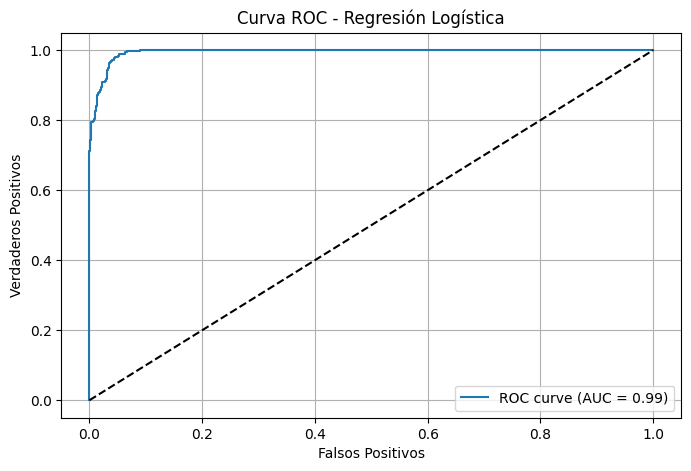

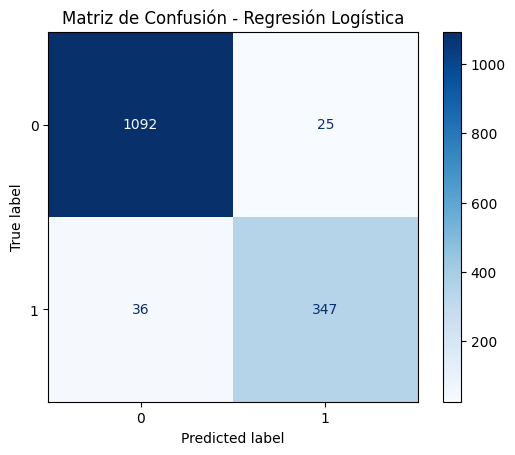

In [64]:
fpr, tpr, _ = roc_curve(yc_test, log_prob)
roc_auc = roc_auc_score(yc_test, log_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.grid(True)
plt.show()

ConfusionMatrixDisplay.from_estimator(log_model, Xc_test, yc_test, cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

### KNN

In [65]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(Xc_train, yc_train)
knn_pred = knn_model.predict(Xc_test)

print("🔎 KNN Accuracy:", round(accuracy_score(yc_test, knn_pred), 4))
print(classification_report(yc_test, knn_pred))

🔎 KNN Accuracy: 0.862
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1117
           1       0.75      0.68      0.72       383

    accuracy                           0.86      1500
   macro avg       0.82      0.80      0.81      1500
weighted avg       0.86      0.86      0.86      1500



### Árbol de decisión

In [ ]:
# Boxplot del valor promedio de ítems por transacción vs preferencia de compra
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="compra_online", y="avg_items_per_transaction")
plt.title("Promedio de Ítems por Transacción vs Preferencia de Compra")
plt.xlabel("Compra Online (1=Sí)")
plt.ylabel("Ítems por Transacción")
plt.grid(True)
plt.show()


In [ ]:
# Barras de frecuencia por nivel educativo
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="education_level", order=df["education_level"].value_counts().index)
plt.title("Frecuencia por Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Comparación de visitas al sitio web entre grupos de compra
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="compra_online", y="website_visits", inner="quartile")
plt.title("Visitas al Sitio Web según Preferencia de Compra")
plt.xlabel("Compra Online (1=Sí)")
plt.ylabel("Visitas al Sitio Web")
plt.grid(True)
plt.show()


In [ ]:
log_model = LogisticRegression(max_iter=300)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_prob = log_model.predict_proba(X_test)[:, 1]

print("📊 Logistic Regression Accuracy:", round(accuracy_score(y_test, log_pred), 4))
print(classification_report(y_test, log_pred))


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("🔎 KNN Accuracy:", round(accuracy_score(y_test, knn_pred), 4))
print(classification_report(y_test, knn_pred))


In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

print("🌳 Árbol de Decisión Accuracy:", round(accuracy_score(y_test, tree_pred), 4))
print(classification_report(y_test, tree_pred))

plt.figure(figsize=(14, 6))
plot_tree(tree_model, filled=True, max_depth=3, feature_names=X.columns, class_names=["Tienda", "Online"])
plt.title("Árbol de Decisión (primeros niveles)")
plt.show()


In [ ]:
fpr, tpr, _ = roc_curve(y_test, log_prob)
roc_auc = roc_auc_score(y_test, log_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.grid(True)
plt.show()

ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


In [ ]:
importances = rf_model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title("Importancia de variables (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


In [ ]:
models = {
    "Random Forest": rf_model,
    "Regresión Logística": LogisticRegression(max_iter=300),
    "KNN": KNeighborsClassifier(),
    "Árbol de Decisión": DecisionTreeClassifier()
}

print("📊 Comparación de exactitud (Validación Cruzada - 5 folds):\n")
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring="accuracy")
    print(f"{name:20}: {scores.mean():.3f} ± {scores.std():.3f}")
